In [163]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import chardet
import calendar

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [164]:
with open('data/Most Streamed Spotify Songs 2024.csv', 'rb') as f:
    result = chardet.detect(f.read(100_000_000)) 
    print(result['encoding'])

ISO-8859-1


In [165]:
data_spotify_songs = pd.read_csv('data/Most Streamed Spotify Songs 2024.csv', encoding='ISO-8859-1')

In [288]:
test = pd.read_csv('data/Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape')
test[(test.Track == 'Sweet Child O\' Mine')]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
3978,Sweet Child O' Mine,Appetite For Destruction,Guns N' Roses,7/21/1987,USGF18714809,"3,931",21.5,"1,879,386,440","295,491","96,032,046",...,416,215.0,"3,290,536",107.0,"885,046,947","444,606",NaN,"10,345,515",NaN,1


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [167]:
data_spotify_songs.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [168]:
data_spotify_songs.columns = data_spotify_songs.columns.str.replace(r' ', r'_', regex=False).str.lower()

In [169]:
data_spotify_songs.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

In [170]:
data_spotify_songs.release_date.isna().value_counts()

release_date
False    4600
Name: count, dtype: int64

In [171]:
data_spotify_songs['release_date'] = pd.to_datetime(data_spotify_songs.release_date)

In [172]:
data_spotify_songs['all_time_rank'] = data_spotify_songs.all_time_rank.str.replace(r',', r'.', regex=False).astype(float)

In [173]:
data_spotify_songs[['tidal_popularity']].isna().value_counts()

tidal_popularity
True                4600
Name: count, dtype: int64

In [174]:
def convert_in_number_type_int(data_frame, columns):
    for column in columns:
        # Премахваме запетайките от стойностите
        data_frame[f'{column}'] = data_frame[f'{column}'].str.replace(r',', r'', regex=False)

        # Опитваме да конвертираме колоната в числови стойности (валидни стойности стават числа, невалидни - NaN)
        data_frame[f'{column}'] = pd.to_numeric(data_frame[f'{column}'], errors='coerce')

        # Няма да заменяме NaN стойности с 0, те ще си останат NaN
        # Преобразуваме колоната към тип 'int' за останалите стойности, но NaN ще останат
        data_frame[f'{column}'] = data_frame[f'{column}'].astype('Int64')  # 'Int64' тип в pandas поддържа NaN

In [175]:
convert_in_number_type_int(data_spotify_songs, ['spotify_streams'
                                                , 'spotify_playlist_count'
                                                , 'spotify_playlist_reach'
                                                , 'youtube_views'
                                                , 'youtube_likes'
                                                , 'tiktok_posts'
                                                , 'tiktok_likes'
                                                , 'tiktok_views'
                                                , 'youtube_playlist_reach'
                                                , 'airplay_spins'
                                                , 'siriusxm_spins'
                                                , 'deezer_playlist_reach'
                                                , 'pandora_streams'
                                                , 'pandora_track_stations'
                                                , 'soundcloud_streams'
                                                , 'shazam_counts'
])

In [176]:
for column in ['spotify_popularity', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']:
    data_spotify_songs[column] = pd.to_numeric(data_spotify_songs[column], errors='coerce').astype('Int64')

In [177]:
data_spotify_songs[['spotify_popularity', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']].dtypes

spotify_popularity            Int64
apple_music_playlist_count    Int64
deezer_playlist_count         Int64
amazon_playlist_count         Int64
dtype: object

In [178]:
data_spotify_songs.spotify_streams.notna().sum()

4487

In [179]:
data_spotify_songs = data_spotify_songs.drop('tidal_popularity', axis=1)

In [180]:
data_spotify_songs

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.000,725.4,390470936,30716,196631588,...,40975,684,62,17598718,114,18004655,22931,4818457,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.000,545.9,323703884,28113,174597137,...,40778,3,67,10422430,111,7780028,28444,6623075,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.000,538.4,601309283,54331,211607669,...,74333,536,136,36321847,172,5022621,5639,7208651,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.000,444.9,2031280633,269802,136569078,...,1474799,2182,264,24684248,210,190260277,203384,<NA>,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5.000,423.3,107034922,7223,151469874,...,12185,1,82,17660624,105,4493884,7006,207179,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4.585,19.4,305049963,65770,5103054,...,6,<NA>,2,14217,<NA>,20104066,13184,50633006,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4.575,19.4,52282360,4602,1449767,...,412,<NA>,1,927,<NA>,<NA>,<NA>,<NA>,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4.571,19.4,189972685,72066,6704802,...,204,<NA>,1,74,6,84426740,28999,<NA>,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4.591,19.4,145467020,14037,7387064,...,1200,<NA>,<NA>,<NA>,7,6817840,<NA>,<NA>,448292,0


In [181]:
data_spotify_songs.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                        float64
track_score                          float64
spotify_streams                        Int64
spotify_playlist_count                 Int64
spotify_playlist_reach                 Int64
spotify_popularity                     Int64
youtube_views                          Int64
youtube_likes                          Int64
tiktok_posts                           Int64
tiktok_likes                           Int64
tiktok_views                           Int64
youtube_playlist_reach                 Int64
apple_music_playlist_count             Int64
airplay_spins                          Int64
siriusxm_spins                         Int64
deezer_playlist_count                  Int64
deezer_playlist_reach                  Int64
amazon_pla

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [182]:
data_spotify_songs.artist.value_counts().head(5)

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

In [183]:
data_spotify_songs[data_spotify_songs.explicit_track == 0].artist.value_counts().head()

artist
Taylor Swift     50
Billie Eilish    25
Bad Bunny        18
KAROL G          18
Morgan Wallen    17
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [184]:
data_spotify_songs.groupby('spotify_streams').apply(lambda x: x.notna()).sum().sort_values(ascending=False)

track                         4487
all_time_rank                 4487
album_name                    4487
spotify_streams               4487
track_score                   4487
explicit_track                4487
isrc                          4487
artist                        4487
release_date                  4487
spotify_playlist_count        4467
spotify_playlist_reach        4465
youtube_views                 4218
youtube_likes                 4211
airplay_spins                 4056
apple_music_playlist_count    4028
shazam_counts                 3974
spotify_popularity            3781
deezer_playlist_count         3670
deezer_playlist_reach         3663
tiktok_likes                  3598
tiktok_views                  3597
youtube_playlist_reach        3557
amazon_playlist_count         3537
pandora_streams               3483
tiktok_posts                  3406
pandora_track_stations        3325
siriusxm_spins                2476
soundcloud_streams            1263
dtype: int64

In [185]:
data_spotify_songs.groupby('spotify_streams').count().sum().sort_values(ascending=False)

track                         4487
all_time_rank                 4487
album_name                    4487
track_score                   4487
explicit_track                4487
isrc                          4487
artist                        4487
release_date                  4487
spotify_playlist_count        4467
spotify_playlist_reach        4465
youtube_views                 4218
youtube_likes                 4211
airplay_spins                 4056
apple_music_playlist_count    4028
shazam_counts                 3974
spotify_popularity            3781
deezer_playlist_count         3670
deezer_playlist_reach         3663
tiktok_likes                  3598
tiktok_views                  3597
youtube_playlist_reach        3557
amazon_playlist_count         3537
pandora_streams               3483
tiktok_posts                  3406
pandora_track_stations        3325
siriusxm_spins                2476
soundcloud_streams            1263
dtype: Int64

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [186]:
years = data_spotify_songs.release_date.dt.year.value_counts()

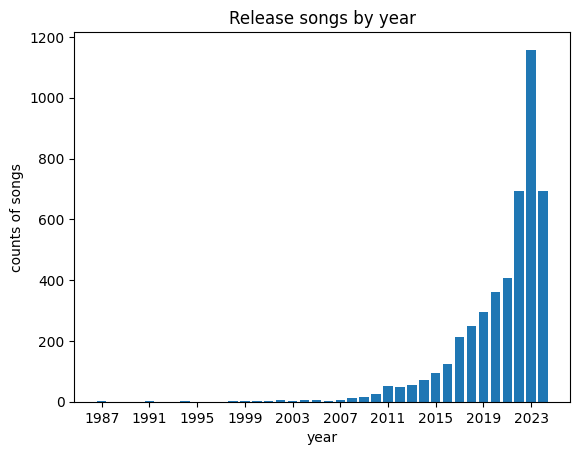

In [187]:
plt.bar(years.index, years)

plt.xticks(range(years.index.min(), years.index.max() + 1, 4))

plt.xlabel('year')
plt.ylabel('counts of songs')
plt.title('Release songs by year')

plt.show()

In [188]:
released_songs_by_months_of_2024 = data_spotify_songs[data_spotify_songs.release_date.dt.year == 2024].release_date.dt.month.value_counts().sort_index()
released_songs_by_months_of_2024.index = [calendar.month_name[m] for m in released_songs_by_months_of_2024.index]

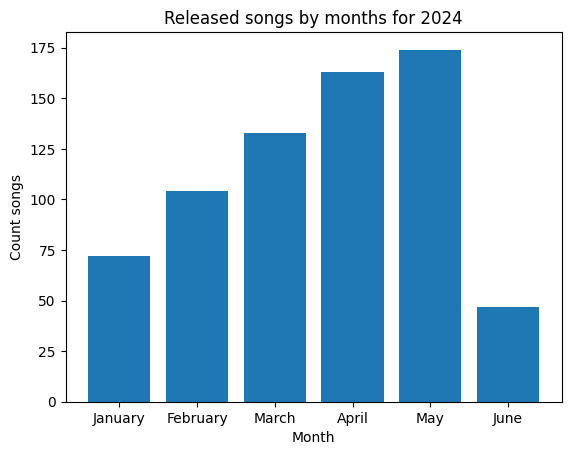

In [189]:
plt.bar(released_songs_by_months_of_2024.index, released_songs_by_months_of_2024)

plt.xticks()

plt.xlabel('Month')
plt.ylabel('Count songs')
plt.title('Released songs by months for 2024')

plt.show()

In [190]:
released_songs_by_months_of_2024.idxmax(), released_songs_by_months_of_2024.max()

('May', 174)

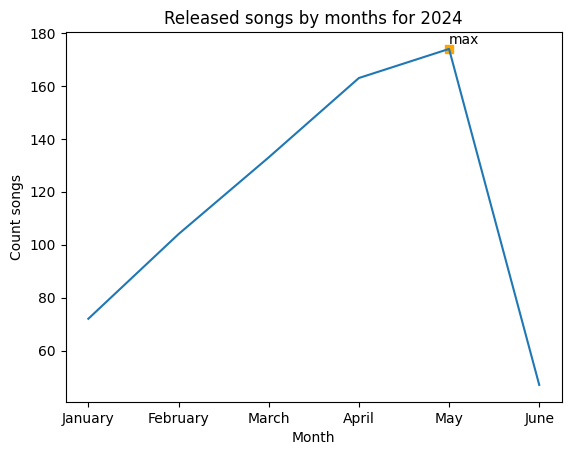

In [191]:
plt.plot(released_songs_by_months_of_2024.index, released_songs_by_months_of_2024)

plt.scatter(released_songs_by_months_of_2024.idxmax(), released_songs_by_months_of_2024.max(), marker='s', color='orange')
plt.annotate('max', (released_songs_by_months_of_2024.idxmax(), released_songs_by_months_of_2024.max() + 2))

plt.xlabel('Month')
plt.ylabel('Count songs')
plt.title('Released songs by months for 2024')

plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [214]:
data_spotify_songs.deezer_playlist_count.value_counts()

deezer_playlist_count
1      283
2      204
3      198
4      160
5      147
      ... 
512      1
350      1
270      1
173      1
217      1
Name: count, Length: 233, dtype: Int64

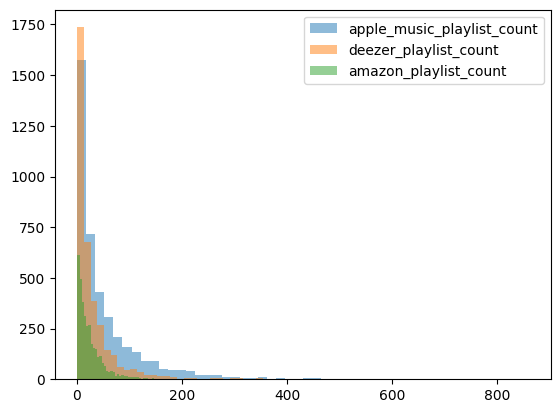

In [215]:
#plt.hist(data_spotify_songs.spotify_playlist_count.dropna(), bins=100, label='spotify_playlist_count', alpha=0.5)
plt.hist(data_spotify_songs.apple_music_playlist_count.dropna(), bins=50, label='apple_music_playlist_count', alpha=0.5)
plt.hist(data_spotify_songs.deezer_playlist_count.dropna(), bins=50, label='deezer_playlist_count', alpha=0.5)
plt.hist(data_spotify_songs.amazon_playlist_count.dropna(), bins=50, label='amazon_playlist_count', alpha=0.5)

plt.xlim()
plt.legend()
plt.show()

In [193]:
plylist_columns = ['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']
pearson_correlation_matrix = data_spotify_songs[plylist_columns].corr(method='pearson')

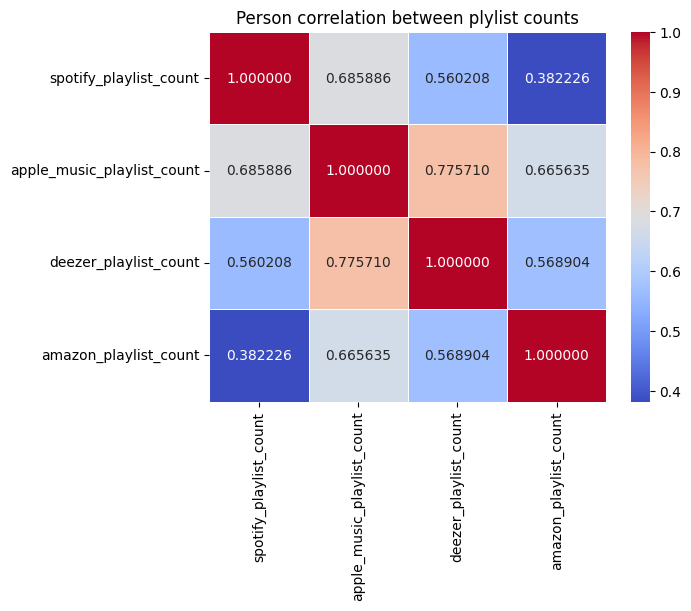

In [102]:
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt='2f', linewidths=0.5)

plt.title('Person correlation between plylist counts')
plt.show()

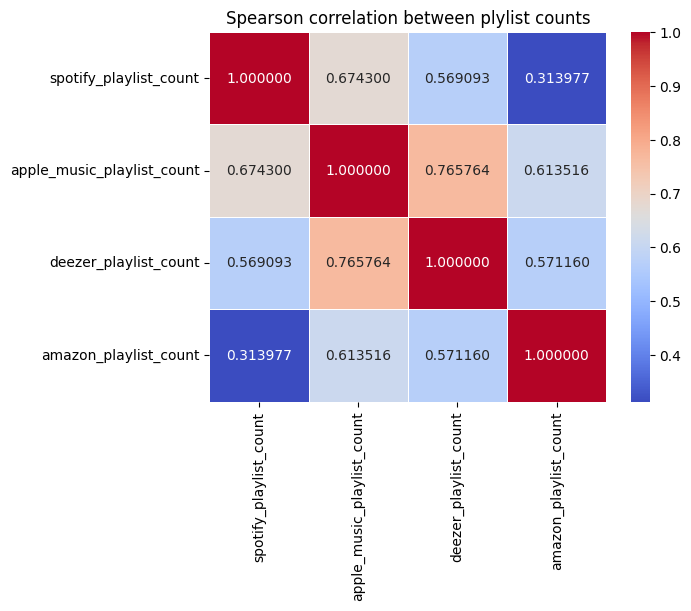

In [70]:
spearson_correlation_matrix = data_spotify_songs[plylist_columns].corr(method='spearman')

sns.heatmap(spearson_correlation_matrix, annot=True, cmap='coolwarm', fmt='2f', linewidths=0.5)

plt.title('Spearson correlation between plylist counts')
plt.show()

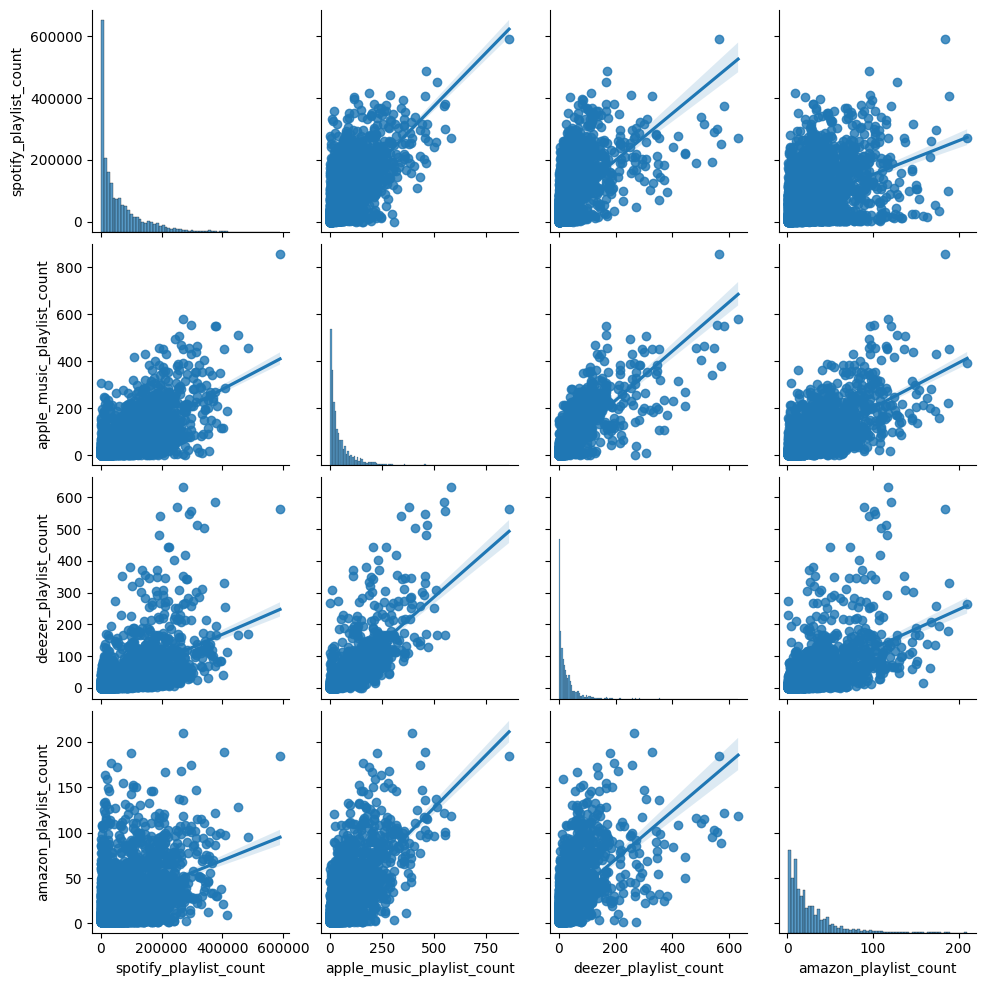

In [110]:
data_spotify_songs_pairplot = data_spotify_songs[plylist_columns].apply(pd.to_numeric, errors='coerce')
data_spotify_songs_pairplot = data_spotify_songs_pairplot.astype('float64')
#data_spotify_songs_pairplot = data_spotify_songs_pairplot.dropna()


sns.pairplot(data_spotify_songs_pairplot, kind="reg")
plt.show()

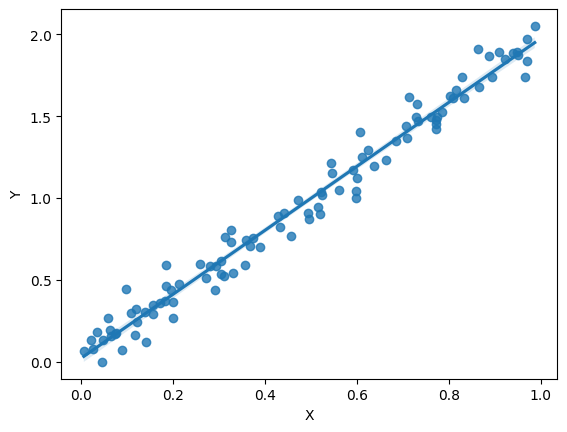

In [111]:
# Генериране на случайни данни
np.random.seed(42)
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)

# Създаване на DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Създаване на графика с регресионна линия
sns.regplot(x='X', y='Y', data=data)

plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

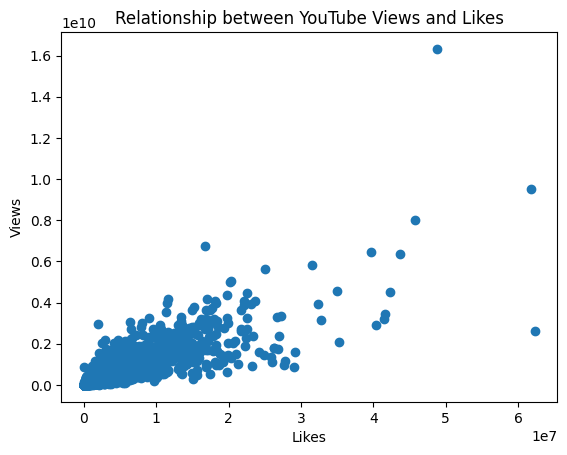

In [229]:
youtobe_likes_views = data_spotify_songs[['youtube_likes', 'youtube_views']].dropna()

plt.scatter(youtobe_likes_views['youtube_likes'],youtobe_likes_views['youtube_views'])

plt.title("Relationship between YouTube Views and Likes")
plt.xlabel("Likes")
plt.ylabel("Views")
plt.show()

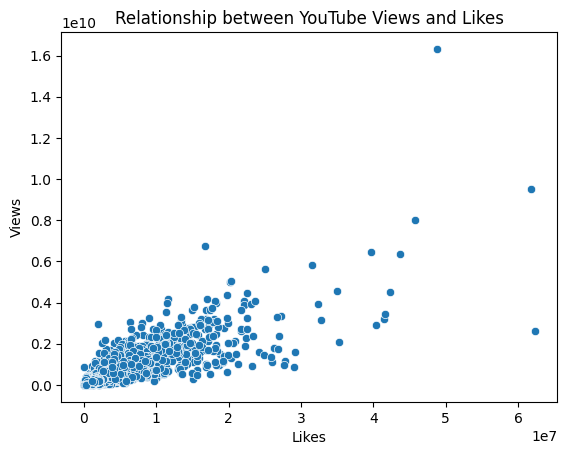

In [233]:
sns.scatterplot(x='youtube_likes', y='youtube_views', data=youtobe_likes_views)

plt.title("Relationship between YouTube Views and Likes")
plt.xlabel("Likes")
plt.ylabel("Views")
plt.show()

In [239]:
youtobe_likes_views['views_to_like_ratio'] = youtobe_likes_views.youtube_views / youtobe_likes_views.youtube_likes
youtobe_likes_views.views_to_like_ratio.agg(['min', 'max', 'mean'])

min          6.929676
max     129287.789776
mean       169.116113
Name: views_to_like_ratio, dtype: float64

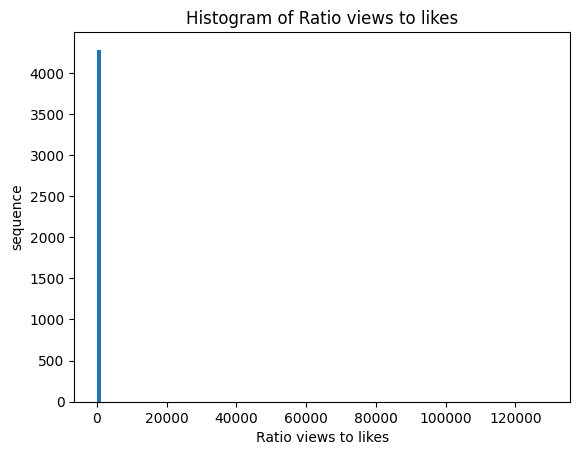

In [242]:
plt.hist(youtobe_likes_views.views_to_like_ratio, bins=100)

plt.xlabel('Ratio views to likes')
plt.ylabel('sequence')
plt.title('Histogram of Ratio views to likes')
plt.show()

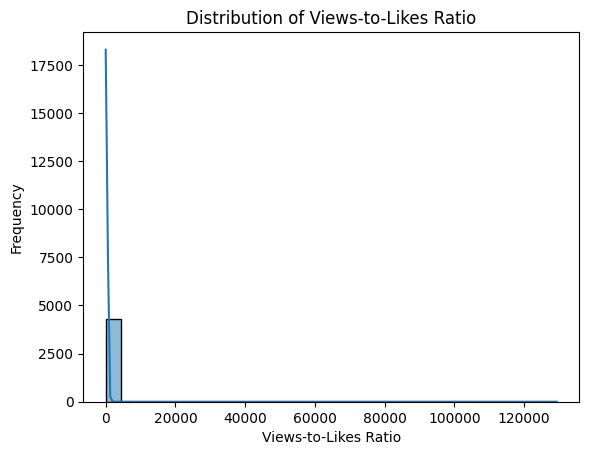

In [243]:
sns.histplot(youtobe_likes_views.views_to_like_ratio, kde=True, bins=30)

plt.title("Distribution of Views-to-Likes Ratio")
plt.xlabel("Views-to-Likes Ratio")
plt.ylabel("Frequency")

plt.show()

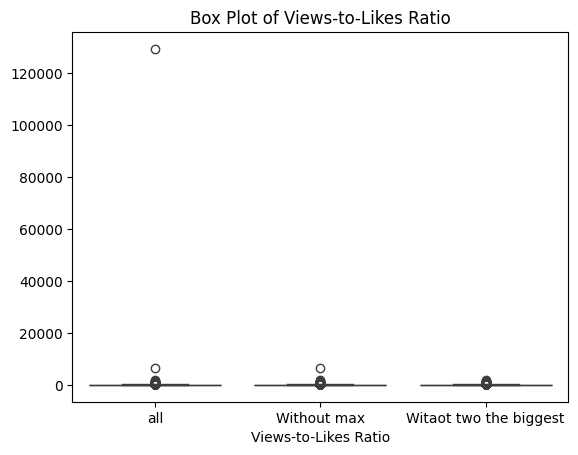

In [262]:
data_boxplot = {
           'all' :  youtobe_likes_views.views_to_like_ratio
            ,'Without max' :  youtobe_likes_views[youtobe_likes_views.views_to_like_ratio < youtobe_likes_views.views_to_like_ratio.max()].views_to_like_ratio
            ,'Witaot two the biggest' : youtobe_likes_views.views_to_like_ratio.sort_values(ascending=False).iloc[2:]
}

data_boxplot = pd.DataFrame(data_boxplot)

sns.boxplot(data=data_boxplot)

plt.title("Box Plot of Views-to-Likes Ratio")
plt.xlabel("Views-to-Likes Ratio")

plt.show()

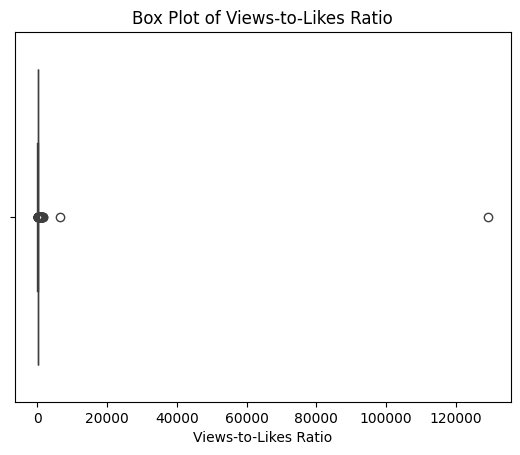

In [263]:
sns.boxplot(x=youtobe_likes_views.views_to_like_ratio)

plt.title("Box Plot of Views-to-Likes Ratio")
plt.xlabel("Views-to-Likes Ratio")

plt.show()

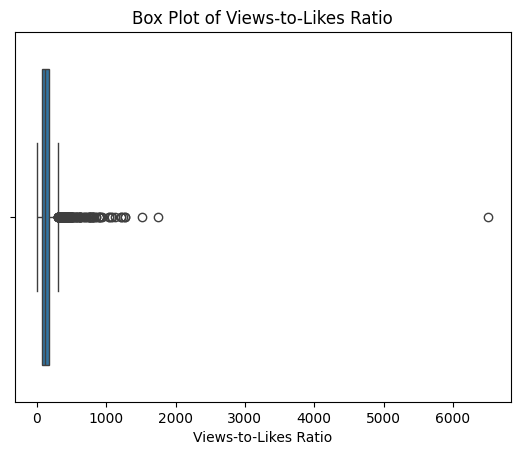

In [247]:
sns.boxplot(x=youtobe_likes_views[youtobe_likes_views.views_to_like_ratio < youtobe_likes_views.views_to_like_ratio.max()].views_to_like_ratio)

plt.title("Box Plot of Views-to-Likes Ratio")
plt.xlabel("Views-to-Likes Ratio")

plt.show()

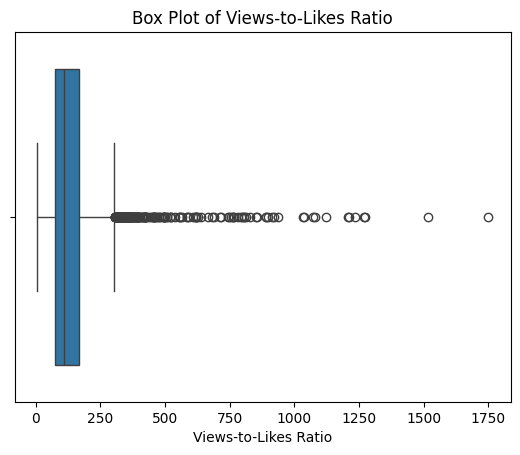

In [252]:
sns.boxplot(x=youtobe_likes_views.views_to_like_ratio.sort_values(ascending=False).iloc[2:])

plt.title("Box Plot of Views-to-Likes Ratio")
plt.xlabel("Views-to-Likes Ratio")

plt.show()

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [274]:
data_spotify_songs[(data_spotify_songs.release_date.dt.year == 1987) & (data_spotify_songs.tiktok_views.notna())]['tiktok_views']

3978    673282408
Name: tiktok_views, dtype: Int64

In [272]:
data_spotify_songs[data_spotify_songs.tiktok_views.notna()].groupby(data_spotify_songs['release_date'].dt.year)['tiktok_views'].sum()

release_date
1987       673282408
1991       720283921
1994     15963128797
1998       803719645
1999       226008149
2000      1500548771
2001       167032445
2002      1102066396
2003      2791915025
2004      2262404643
2005    222395424736
2006      2633023886
2007      4439372196
2008     10235952720
2009      9018974772
2010     22050433351
2011    273542485517
2012     24485420283
2013     66675242055
2014     55645704122
2015     70701003150
2016     78330317089
2017    174362854260
2018    267661151841
2019    394210724566
2020    533191896010
2021    631177503424
2022    832975012888
2023    454816188900
2024     47470965442
Name: tiktok_views, dtype: Int64

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.